# Reconstruction Demo script

1. for horizontal line in stack of projections X
   1. reconstruct (perform inverse radon transform)
2. z-stack and view
   1. slider to view position in stack


In [1]:
from skimage.transform import iradon
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
PATH_TO_IMAGE =  '../data_store/spin_3/MMStack_Pos0.ome.tif'
PATH_TO_IMAGE =  '../data_store/aligned.tif'
PATH_TO_IMAGE =  '../data_store/2022-10-10_1433_testrecon/2022-10-10_1433_testrecon_result.tif'
PATH_TO_IMAGE =  '../data_store/2022-10-10_1433_testrecon/cut.tif'
im = io.imread(PATH_TO_IMAGE)
# Expect the shape to be in (angles, length, width)
print(im.shape)

(400, 1392, 932)


In [3]:
# Generate list of angles for which the sample is expected to rotate
# The last datapoint is excluded 
theta = np.linspace(0, 360, np.shape(im)[0], endpoint=False)

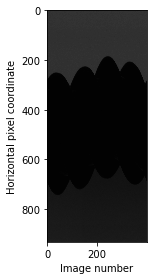

In [4]:
# Convert image stack to sinograms
# Want shape (length, width, angles)
sinogram = np.moveaxis(im, 0, -1)
%matplotlib inline
# Display the sinogram for the first row of pixels
plt.ylabel('Horizontal pixel coordinate')
plt.xlabel('Image number')
io.imshow(sinogram[0])


In [5]:
# Reconstruct dataset here

reconstruction_fbp = np.zeros((im.shape[1], im.shape[2], im.shape[2]))
for i in tqdm(range(im.shape[1])):
    reconstruction_fbp[i] = iradon(sinogram[i], theta=theta, filter_name='ramp')
    


100%|██████████| 1392/1392 [57:25<00:00,  2.48s/it] 


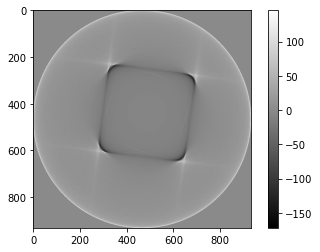

In [6]:
plt.imshow(reconstruction_fbp[2], cmap='gray')
plt.colorbar()

In [9]:
from matplotlib.widgets import Slider, Button
%matplotlib 

Using matplotlib backend: MacOSX


In [10]:
# The parametrized function to be plotted
def f(index):
    return reconstruction_fbp[index]

max_index = im.shape[1]
allowed_indices = np.arange(0, max_index)

# Define initial parameters
init_index = 0

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
display = ax.imshow(f(init_index), cmap='gray')
ax.set_xlabel('lateral coordinate')
ax.set_ylabel('axial coordinate')

# adjust the main plot to make room for the sliders
fig.subplots_adjust(bottom=0.25)

# # Make a horizontal slider to control the frequency.
ax_index = fig.add_axes([0.2, 0.1, 0.65, 0.03])
index_slider = Slider(
    ax=ax_index,
    label='Stack index',
    valmin=0,
    valmax= max_index,
    valstep = allowed_indices,
    valinit=init_index,
)

# The function to be called anytime a slider's value changes
def update(val):
    display = ax.imshow(f(index_slider.val), cmap='gray')
    # ax.(f(t, amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
index_slider.on_changed(update)
# amp_slider.on_changed(update)

# # Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
# resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
# button = Button(resetax, 'Reset', hovercolor='0.975')


# def reset(event):
#     freq_slider.reset()
#     amp_slider.reset()
# button.on_clicked(reset)

plt.show()

In [7]:
# Save reconstructed dataset as pickle file
import pickle
with open('cut.pkl', 'wb') as handle:
    pickle.dump(reconstruction_fbp, handle, protocol=pickle.HIGHEST_PROTOCOL)

KeyboardInterrupt: 